# LENDING CLUB CASE STUDY


PROBLEM


To minimize the chance of losing money while making loans to clients by being aware of risk analytics in banking and financial services.

The bank's choice carries two different kinds of risks:


-If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

-If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

In [39]:
# Importing the Basic Packages

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [40]:
loan_data = pd.read_csv('loan.csv',low_memory=False)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Cleaning

In [42]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [43]:
loan_data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
loan_data.shape

(39717, 111)

In [45]:
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [46]:
null_columns = list(loan_data.columns[loan_data.isna().all()])
len(null_columns)

54

In [47]:
loan_data = loan_data.drop(null_columns, axis=1)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [48]:
loan_data.shape

(39717, 57)

In [49]:
loan_data.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
pymnt_plan                        1
initial_list_status               1
term                              2
next_pymnt_d                      2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                

In [50]:
for column in loan_data.columns:
    if loan_data[column].nunique(dropna=True) == 1:
        loan_data = loan_data.drop(column, axis=1)
    else:
        pass
loan_data.nunique().sort_values()

next_pymnt_d                   2
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 5
pub_rec                        5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
mths_since_last_delinq        95
last_pymnt_d                 101
last_credit_pull_d           106
mths_since_last_record       111
int_rate                     371
earliest_cr_line             526
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
out_prncp_inv               1138
total_rec_late_fee          1356
collection

In [51]:
loan_data = loan_data.drop(['url','member_id','id'], axis = 1)
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [52]:
loan_data.shape

(39717, 45)

In [53]:
del_columns = ['sub_grade','emp_title','desc','title','zip_code','earliest_cr_line','inq_last_6mths',
               'mths_since_last_delinq','mths_since_last_record','revol_bal','pub_rec','open_acc',
               'total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_late_fee',
               'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d',
               'last_credit_pull_d','total_rec_prncp','total_rec_int']

In [54]:
loan_data = loan_data.drop(del_columns, axis = 1)
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,revol_util,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,83.70%,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,9.40%,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,98.50%,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,21%,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,53.90%,0.0


In [55]:
loan_data.shape

(39717, 19)

In [56]:
loan_data.isnull().all(axis=1).sum()

0

In [57]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [58]:
loan_data = loan_data[~(loan_data['loan_status'] == 'Current')]
loan_data.shape

(38577, 19)

In [59]:
loan_data.duplicated().sum()

0

In [60]:
loan_data.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
revol_util                50
pub_rec_bankruptcies     697
dtype: int64

In [61]:
 print(round((loan_data.isnull().sum()/len(loan_data)*100),2))

loan_amnt               0.00
funded_amnt             0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
emp_length              2.68
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
addr_state              0.00
dti                     0.00
delinq_2yrs             0.00
revol_util              0.13
pub_rec_bankruptcies    1.81
dtype: float64


In [62]:
loan_data.dropna(inplace = True)
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,revol_util,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,83.70%,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,9.40%,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,98.50%,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,21%,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,28.30%,0.0


In [63]:
total_rows = 39717
rows_deleted= round(((total_rows- len(loan_data))*100)/total_rows,2)

print('Percentage of deleted rows = ',rows_deleted)

Percentage of deleted rows =  7.34


In [64]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36800 entries, 0 to 39680
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36800 non-null  int64  
 1   funded_amnt           36800 non-null  int64  
 2   funded_amnt_inv       36800 non-null  float64
 3   term                  36800 non-null  object 
 4   int_rate              36800 non-null  object 
 5   installment           36800 non-null  float64
 6   grade                 36800 non-null  object 
 7   emp_length            36800 non-null  object 
 8   home_ownership        36800 non-null  object 
 9   annual_inc            36800 non-null  float64
 10  verification_status   36800 non-null  object 
 11  issue_d               36800 non-null  object 
 12  loan_status           36800 non-null  object 
 13  purpose               36800 non-null  object 
 14  addr_state            36800 non-null  object 
 15  dti                   36

In [65]:
loan_data['issue_d']= pd.to_datetime(loan_data['issue_d'],format='%b-%y')
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36800 entries, 0 to 39680
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             36800 non-null  int64         
 1   funded_amnt           36800 non-null  int64         
 2   funded_amnt_inv       36800 non-null  float64       
 3   term                  36800 non-null  object        
 4   int_rate              36800 non-null  object        
 5   installment           36800 non-null  float64       
 6   grade                 36800 non-null  object        
 7   emp_length            36800 non-null  object        
 8   home_ownership        36800 non-null  object        
 9   annual_inc            36800 non-null  float64       
 10  verification_status   36800 non-null  object        
 11  issue_d               36800 non-null  datetime64[ns]
 12  loan_status           36800 non-null  object        
 13  purpose              

In [66]:
loan_data.head(15)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,revol_util,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,83.70%,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,9.40%,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,98.50%,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,21%,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,28.30%,0.0
6,7000,7000,7000.0,60 months,15.96%,170.08,C,8 years,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,NC,23.51,0,85.60%,0.0
7,3000,3000,3000.0,36 months,18.64%,109.43,E,9 years,RENT,48000.0,Source Verified,2011-12-01,Fully Paid,car,CA,5.35,0,87.50%,0.0
8,5600,5600,5600.0,60 months,21.28%,152.39,F,4 years,OWN,40000.0,Source Verified,2011-12-01,Charged Off,small_business,CA,5.55,0,32.60%,0.0
9,5375,5375,5350.0,60 months,12.69%,121.45,B,< 1 year,RENT,15000.0,Verified,2011-12-01,Charged Off,other,TX,18.08,0,36.50%,0.0
10,6500,6500,6500.0,60 months,14.65%,153.45,C,5 years,OWN,72000.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,AZ,16.12,0,20.60%,0.0


In [67]:
loan_data['int_rate']=loan_data['int_rate'].str.strip('%').astype(float)
loan_data['revol_util']=loan_data['revol_util'].str.strip('%').astype(float)

In [68]:
loan_data[['funded_amnt_inv','annual_inc','int_rate','dti']] = np.round(loan_data[['funded_amnt_inv','annual_inc','int_rate', 'dti']],1).astype(int)
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,revol_util,pub_rec_bankruptcies
0,5000,5000,4975,36 months,10,162.87,B,10+ years,RENT,24000,Verified,2011-12-01,Fully Paid,credit_card,AZ,27,0,83.7,0.0
1,2500,2500,2500,60 months,15,59.83,C,< 1 year,RENT,30000,Source Verified,2011-12-01,Charged Off,car,GA,1,0,9.4,0.0
2,2400,2400,2400,36 months,16,84.33,C,10+ years,RENT,12252,Not Verified,2011-12-01,Fully Paid,small_business,IL,8,0,98.5,0.0
3,10000,10000,10000,36 months,13,339.31,C,10+ years,RENT,49200,Source Verified,2011-12-01,Fully Paid,other,CA,20,0,21.0,0.0
5,5000,5000,5000,36 months,7,156.46,A,3 years,RENT,36000,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11,0,28.3,0.0


In [69]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36800 entries, 0 to 39680
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             36800 non-null  int64         
 1   funded_amnt           36800 non-null  int64         
 2   funded_amnt_inv       36800 non-null  int64         
 3   term                  36800 non-null  object        
 4   int_rate              36800 non-null  int64         
 5   installment           36800 non-null  float64       
 6   grade                 36800 non-null  object        
 7   emp_length            36800 non-null  object        
 8   home_ownership        36800 non-null  object        
 9   annual_inc            36800 non-null  int64         
 10  verification_status   36800 non-null  object        
 11  issue_d               36800 non-null  datetime64[ns]
 12  loan_status           36800 non-null  object        
 13  purpose              

In [70]:
loan_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,revol_util,pub_rec_bankruptcies
count,36800.000000,36800.000000,36800.000000,36800.000000,36800.000000,3.680000e+04,36800,36800.000000,36800.000000,36800.000000,36800.000000
mean,11149.540761,10880.794837,10438.979293,11.536386,324.906537,6.943448e+04,2010-11-11 02:21:10.956521472,12.887772,0.146141,48.992830,0.041821
min,500.000000,500.000000,0.000000,5.000000,16.080000,4.000000e+03,2007-08-01 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,8.000000,167.730000,4.113300e+04,2010-05-01 00:00:00,8.000000,0.000000,25.600000,0.000000
50%,10000.000000,9600.000000,9000.000000,11.000000,280.110000,6.000000e+04,2011-02-01 00:00:00,13.000000,0.000000,49.500000,0.000000
75%,15000.000000,15000.000000,14350.000000,14.000000,429.365000,8.300000e+04,2011-08-01 00:00:00,18.000000,0.000000,72.500000,0.000000
max,35000.000000,35000.000000,35000.000000,24.000000,1305.190000,6.000000e+06,2011-12-01 00:00:00,30.000000,11.000000,99.900000,2.000000
std,7369.855703,7109.157574,7008.500774,3.740529,208.891979,6.402159e+04,NaN,6.647459,0.491844,28.313209,0.200859


0.50     60000.00
0.75     83000.00
0.90    116738.90
0.93    129700.00
0.94    135000.00
0.95    142000.00
0.97    165996.12
0.98    188023.92
0.99    235000.00
Name: annual_inc, dtype: float64


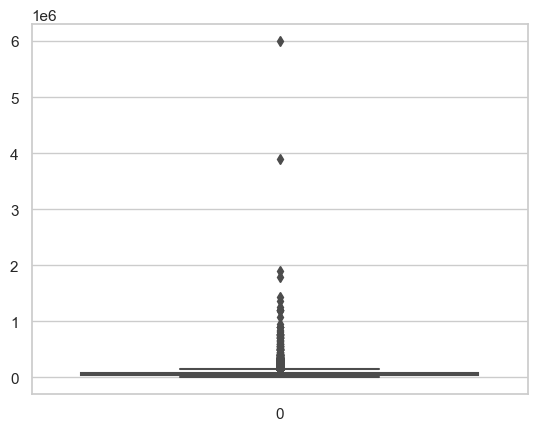

In [71]:
sns.boxplot(loan_data['annual_inc'])
quant_annual_inc = loan_data.annual_inc.quantile([0.5, 0.75,0.90,0.93, 0.94, 0.95, 0.97,0.98, 0.99])
print(quant_annual_inc)

In [72]:
quant_93 = loan_data['annual_inc'].quantile(0.93)
loan_data = loan_data[loan_data.annual_inc <= quant_93]
loan_data.shape

(34225, 19)

0.50     56000.00
0.75     75996.00
0.90     98000.00
0.93    104220.04
0.94    107000.00
0.95    110000.00
0.97    118000.00
0.98    120000.00
0.99    124800.00
Name: annual_inc, dtype: float64


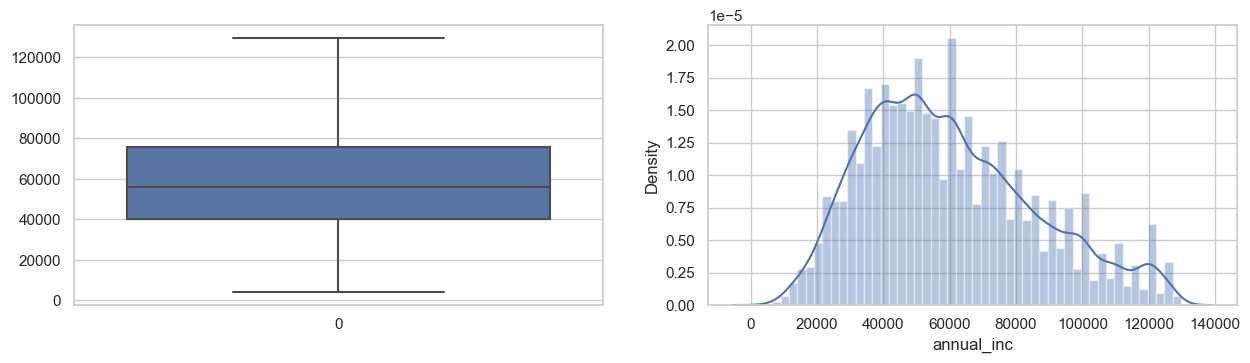

In [73]:
quant_annual_inc = loan_data.annual_inc.quantile([0.5, 0.75,0.90,0.93, 0.94, 0.95, 0.97,0.98, 0.99])
print(quant_annual_inc)

plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(loan_data.annual_inc)
plt.subplot(2,2,2)
sns.distplot(loan_data['annual_inc'])
plt.show()

In [74]:
selected_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']


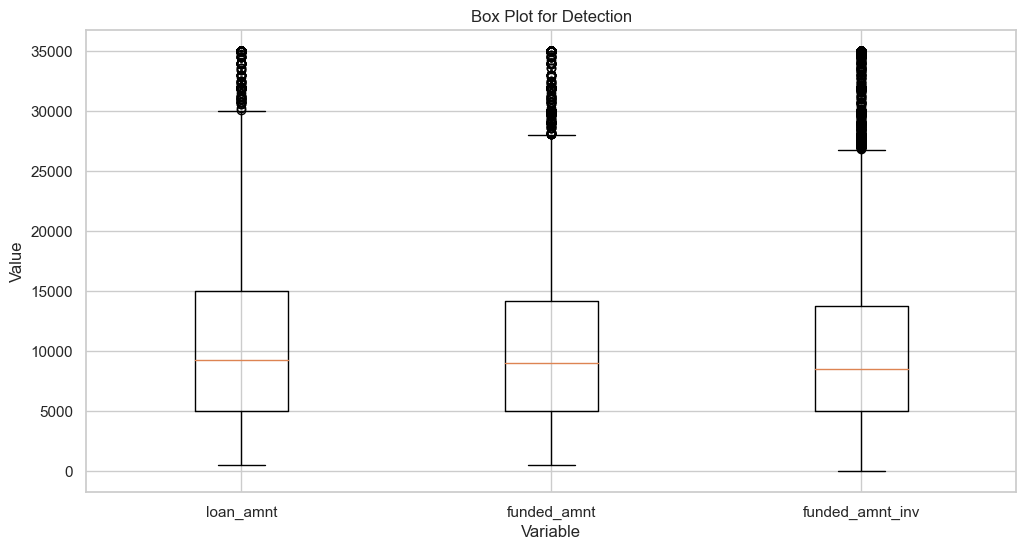

In [76]:
plt.figure(figsize = (12,6))
plt.boxplot([loan_data[col] for col in selected_columns], labels=selected_columns)

plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Box Plot for Detection')

plt.show()

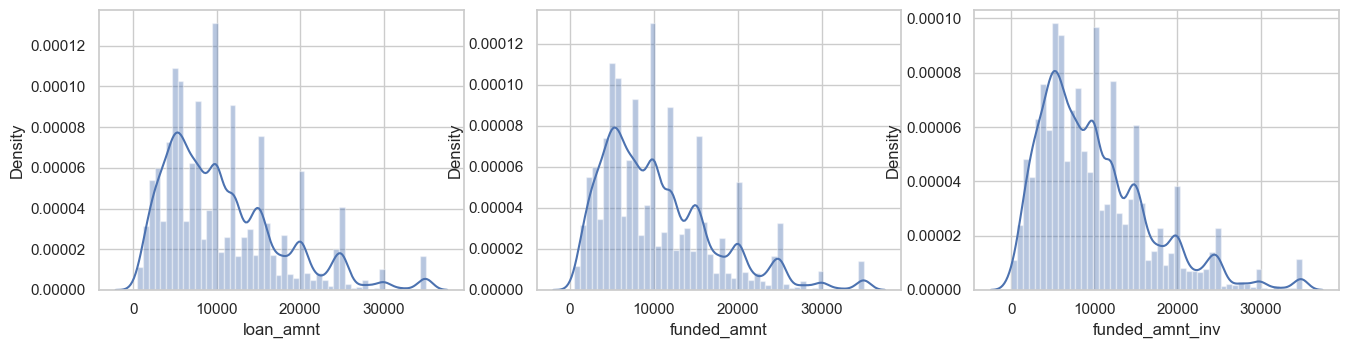

In [77]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
sns.distplot(loan_data['loan_amnt'])
plt.subplot(2,3,2)
sns.distplot(loan_data['funded_amnt'])
plt.subplot(2,3,3)
sns.distplot(loan_data['funded_amnt_inv'])
plt.show()

# Univariate Analysis

In [79]:
print(round(loan_data.loan_status.value_counts()*100/loan_data.loan_status.count()),1)
print('-------------------------------------')

loan_status
Fully Paid     85.0
Charged Off    15.0
Name: count, dtype: float64 1
-------------------------------------


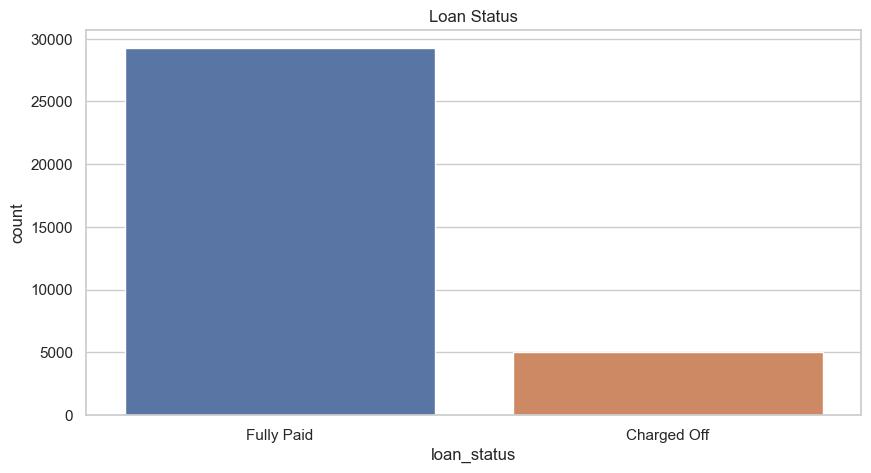

In [80]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data =loan_data,x='loan_status')
ax.set_title('Loan Status')
plt.show()

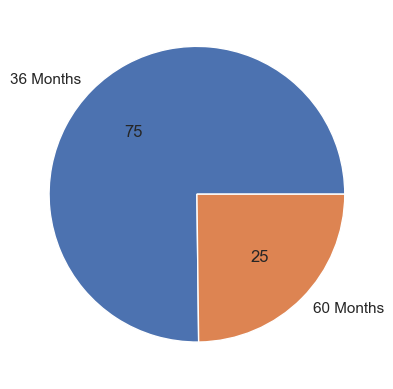

In [81]:
plt.pie(loan_data['term'].value_counts(), labels=['36 Months','60 Months'],autopct='%.0f')
plt.show()

verification_status
Not Verified       44.0
Verified           30.0
Source Verified    26.0
Name: count, dtype: float64 1
-------------------------------------


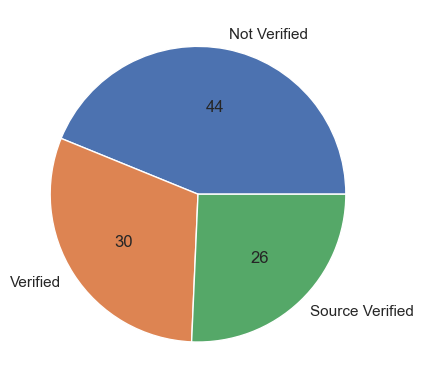

In [82]:
print(round(loan_data.verification_status.value_counts()*100/loan_data.verification_status.count()),1)
print('-------------------------------------')

plt.pie(loan_data['verification_status'].value_counts(), labels = ['Not Verified','Verified','Source Verified'],autopct='%.0f')
plt.show()

verification_status
Not Verified       44.0
Verified           30.0
Source Verified    26.0
Name: count, dtype: float64 1
-------------------------------------


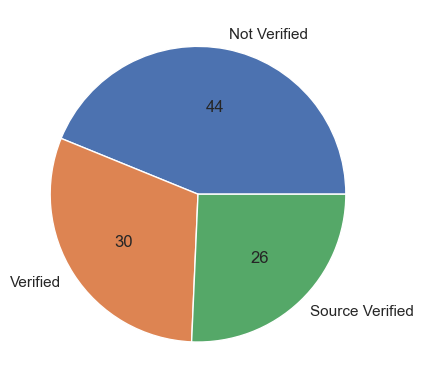

In [83]:
print(round(loan_data.verification_status.value_counts()*100/loan_data.verification_status.count()),1)
print('-------------------------------------')

plt.pie(loan_data['verification_status'].value_counts(), labels = ['Not Verified','Verified','Source Verified'],autopct='%.0f')
plt.show()

In [84]:
print(round(loan_data.purpose.value_counts()*100/loan_data.purpose.count()),1)
print('-------------------------------------')


purpose
debt_consolidation    48.0
credit_card           13.0
other                 10.0
home_improvement       7.0
major_purchase         6.0
small_business         4.0
car                    4.0
wedding                2.0
medical                2.0
moving                 1.0
vacation               1.0
house                  1.0
educational            1.0
renewable_energy       0.0
Name: count, dtype: float64 1
-------------------------------------


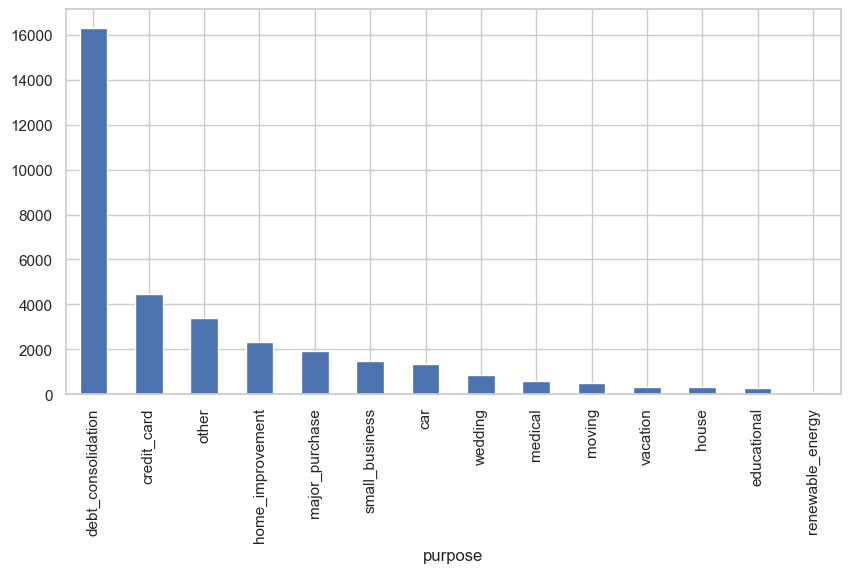

In [85]:
plt.figure(figsize=(10,5))
loan_data['purpose'].value_counts().plot.bar()
plt.show()

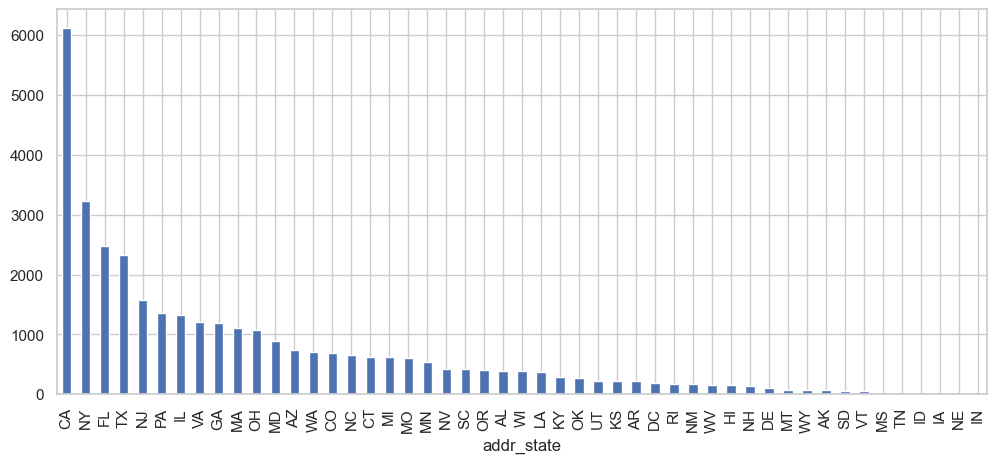

In [86]:
plt.figure(figsize=(12,5))
loan_data['addr_state'].value_counts().plot.bar()
plt.show()

In [87]:
print(round(loan_data.emp_length.value_counts()*100/loan_data.emp_length.count()),1)
print('-------------------------------------')


emp_length
10+ years    22.0
< 1 year     12.0
2 years      12.0
3 years      11.0
4 years       9.0
5 years       9.0
1 year        9.0
6 years       6.0
7 years       5.0
8 years       4.0
9 years       3.0
Name: count, dtype: float64 1
-------------------------------------


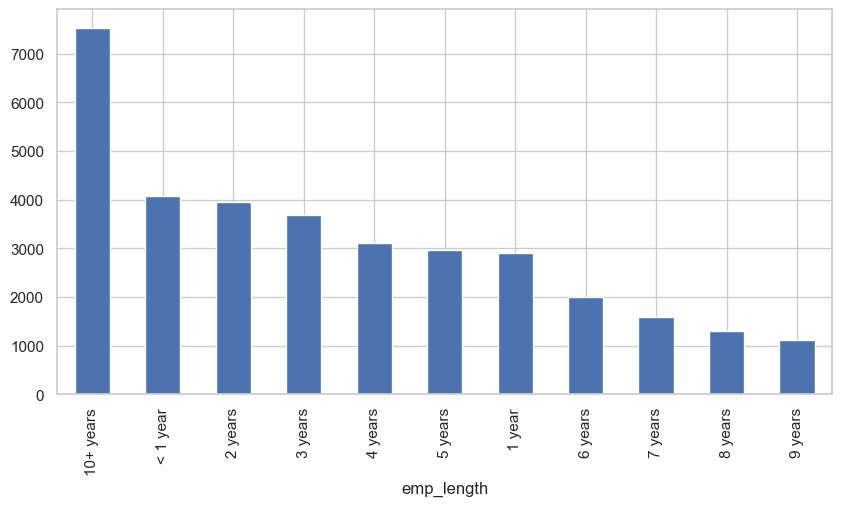

In [88]:
plt.figure(figsize=(10,5))
loan_data['emp_length'].value_counts().plot.bar()
plt.show()

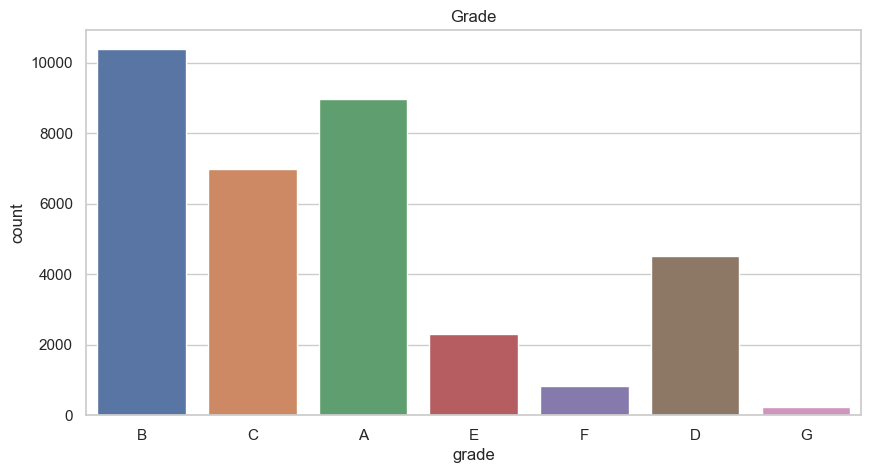

In [89]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data =loan_data,x='grade')
ax.set_title('Grade')
plt.show()

count    34225.000000
mean        11.478159
std          3.708879
min          5.000000
25%          8.000000
50%         11.000000
75%         14.000000
max         24.000000
Name: int_rate, dtype: float64
----------------------------------


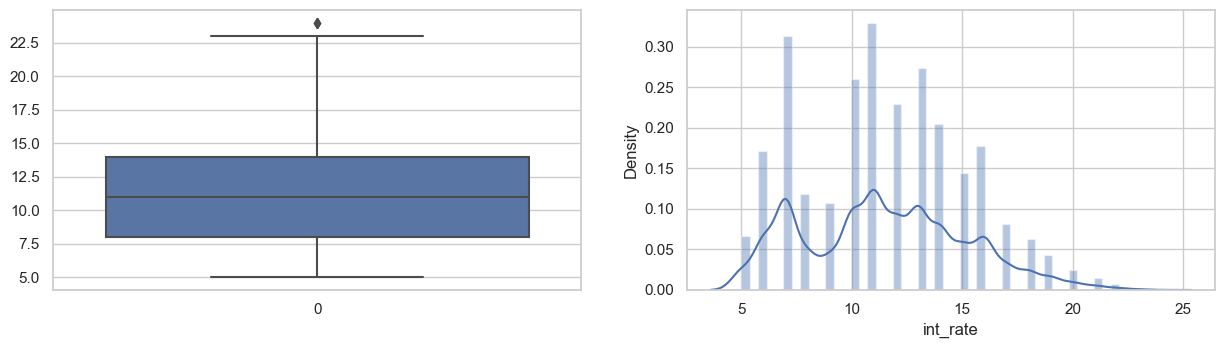

In [90]:
print(loan_data['int_rate'].describe())
print('----------------------------------')
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(loan_data.int_rate)
plt.subplot(2,2,2)
sns.distplot(loan_data['int_rate'])
plt.show()

count    34225.000000
mean     10659.157779
std       6980.194751
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
----------------------------------


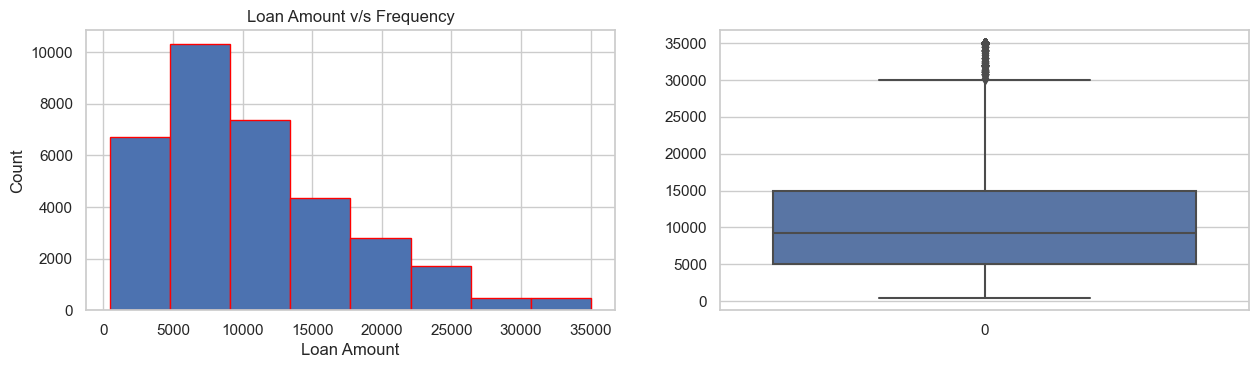

In [91]:
print(loan_data['loan_amnt'].describe())
print('----------------------------------')
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.hist(loan_data['loan_amnt'],edgecolor="red", bins = 8)
plt.title('Loan Amount v/s Frequency')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.subplot(2,2,2)
sns.boxplot(loan_data.loan_amnt)
plt.show()

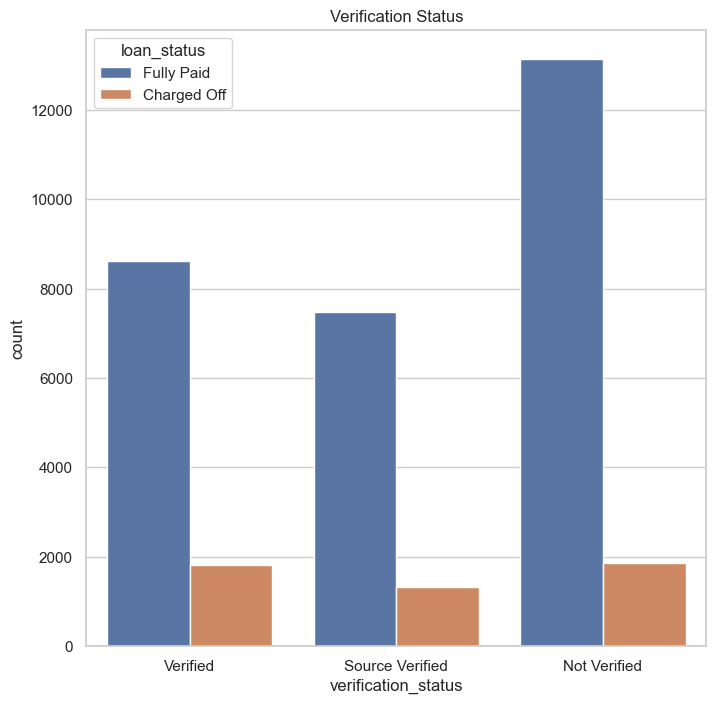

In [92]:
plt.figure(figsize=(8,8))
ax = sns.countplot(data =loan_data,x='verification_status', hue ='loan_status')
ax.set_title('Verification Status')
plt.show()

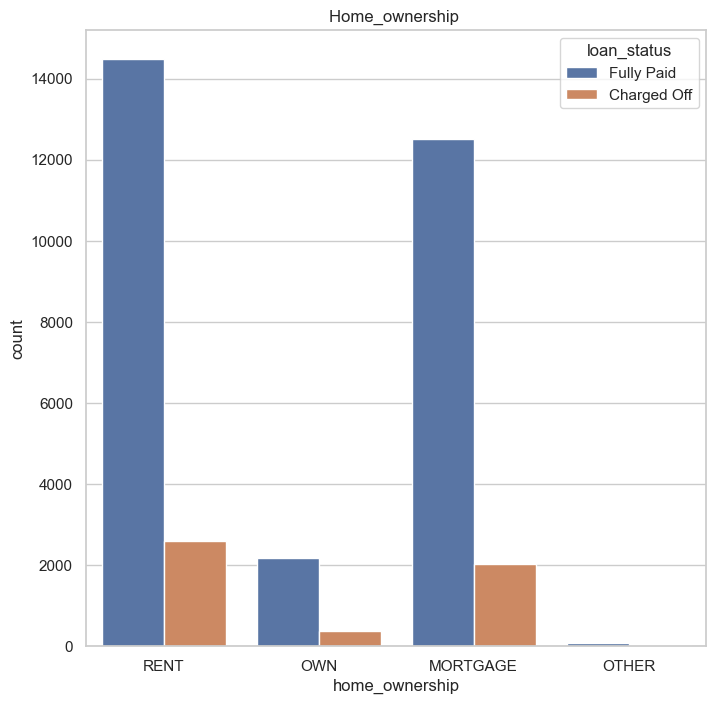

In [93]:
plt.figure(figsize=(8,8))
ax = sns.countplot(data =loan_data,x='home_ownership', hue ='loan_status')
ax.set_title('Home_ownership ')
plt.show()

# Derived Analysis Column Wise

In [94]:
loan_data['issue_year']=pd.DatetimeIndex(loan_data['issue_d']).year
loan_data['issue_month']=pd.DatetimeIndex(loan_data['issue_d']).month
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,revol_util,pub_rec_bankruptcies,issue_year,issue_month
0,5000,5000,4975,36 months,10,162.87,B,10+ years,RENT,24000,...,2011-12-01,Fully Paid,credit_card,AZ,27,0,83.7,0.0,2011,12
1,2500,2500,2500,60 months,15,59.83,C,< 1 year,RENT,30000,...,2011-12-01,Charged Off,car,GA,1,0,9.4,0.0,2011,12
2,2400,2400,2400,36 months,16,84.33,C,10+ years,RENT,12252,...,2011-12-01,Fully Paid,small_business,IL,8,0,98.5,0.0,2011,12
3,10000,10000,10000,36 months,13,339.31,C,10+ years,RENT,49200,...,2011-12-01,Fully Paid,other,CA,20,0,21.0,0.0,2011,12
5,5000,5000,5000,36 months,7,156.46,A,3 years,RENT,36000,...,2011-12-01,Fully Paid,wedding,AZ,11,0,28.3,0.0,2011,12


In [96]:
loan_data.issue_year.value_counts()

issue_year
2011    18341
2010    10459
2009     4387
2008     1031
2007        7
Name: count, dtype: int64

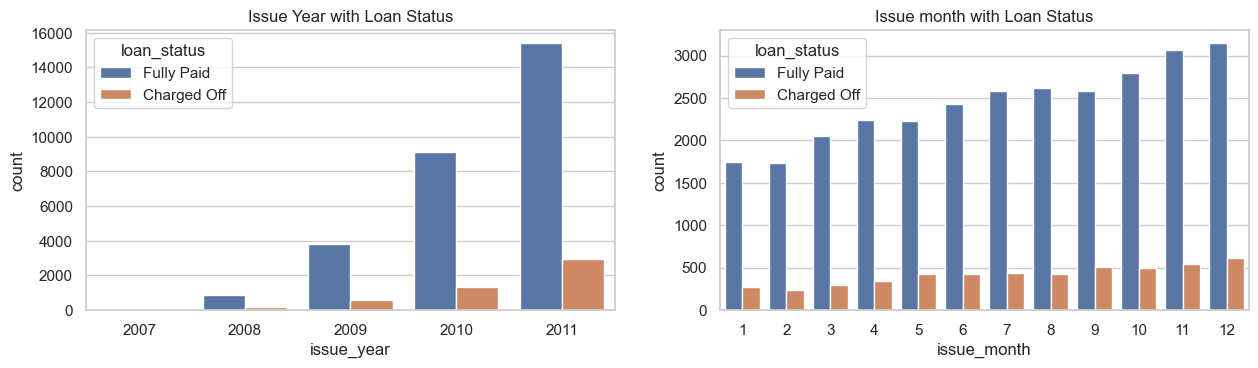

In [97]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
ax = sns.countplot(data =loan_data,x='issue_year', hue ='loan_status')
ax.set_title('Issue Year with Loan Status')
plt.subplot(2,2,2)
ax = sns.countplot(data =loan_data,x='issue_month', hue ='loan_status')
ax.set_title('Issue month with Loan Status')
plt.show()

In [98]:
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low'
    elif (column >9) and (column <= 11):
        return 'Low'
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High'

loan_data['int_rate_bin'] = loan_data.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,addr_state,dti,delinq_2yrs,revol_util,pub_rec_bankruptcies,issue_year,issue_month,int_rate_bin
0,5000,5000,4975,36 months,10,162.87,B,10+ years,RENT,24000,...,Fully Paid,credit_card,AZ,27,0,83.7,0.0,2011,12,Low
1,2500,2500,2500,60 months,15,59.83,C,< 1 year,RENT,30000,...,Charged Off,car,GA,1,0,9.4,0.0,2011,12,High
2,2400,2400,2400,36 months,16,84.33,C,10+ years,RENT,12252,...,Fully Paid,small_business,IL,8,0,98.5,0.0,2011,12,Very High
3,10000,10000,10000,36 months,13,339.31,C,10+ years,RENT,49200,...,Fully Paid,other,CA,20,0,21.0,0.0,2011,12,Moderate
5,5000,5000,5000,36 months,7,156.46,A,3 years,RENT,36000,...,Fully Paid,wedding,AZ,11,0,28.3,0.0,2011,12,Very Low


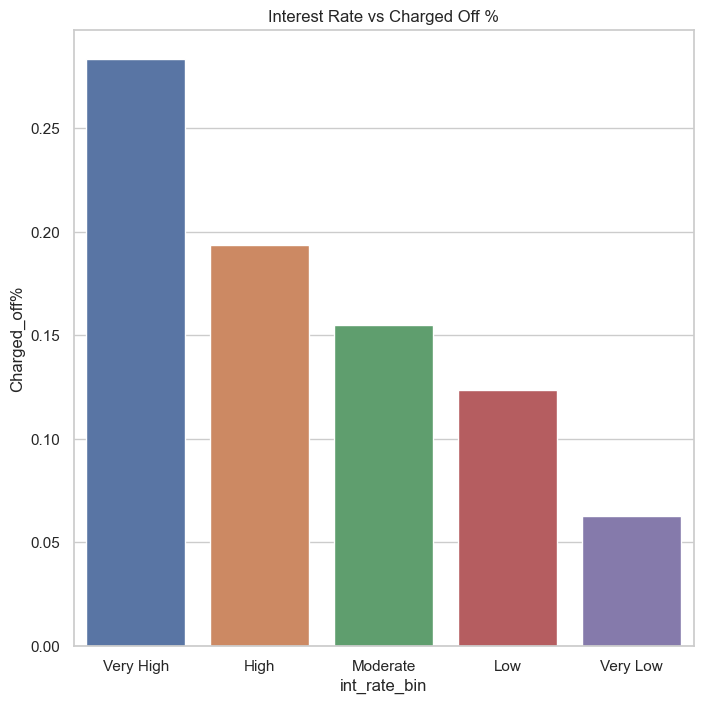

In [99]:
int_vs_status = loan_data.groupby(['int_rate_bin','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
int_vs_status['Total'] = int_vs_status['Charged Off']+ int_vs_status['Fully Paid']
int_vs_status['Charged_off%'] = int_vs_status['Charged Off']/int_vs_status['Total']
int_vs_status = int_vs_status.sort_values('Charged_off%', ascending = False)

plt.figure(figsize=(8,8))
ax = sns.barplot(data =int_vs_status,x='int_rate_bin', y='Charged_off%')
ax.set_title('Interest Rate vs Charged Off %')
plt.show()

In [100]:
def bucket_dti(column):
    if column <= 5:
        return 'Very Low'
    elif (column >5) and (column <= 10):
        return 'Low'
    elif (column >10) and (column <= 15):
        return 'Moderate'
    elif (column >15) and (column <= 20):
        return 'High'
    else:
        return 'Very High'

loan_data['dti_bin'] = loan_data.apply(lambda x : bucket_dti(x.dti), axis = 1)
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,purpose,addr_state,dti,delinq_2yrs,revol_util,pub_rec_bankruptcies,issue_year,issue_month,int_rate_bin,dti_bin
0,5000,5000,4975,36 months,10,162.87,B,10+ years,RENT,24000,...,credit_card,AZ,27,0,83.7,0.0,2011,12,Low,Very High
1,2500,2500,2500,60 months,15,59.83,C,< 1 year,RENT,30000,...,car,GA,1,0,9.4,0.0,2011,12,High,Very Low
2,2400,2400,2400,36 months,16,84.33,C,10+ years,RENT,12252,...,small_business,IL,8,0,98.5,0.0,2011,12,Very High,Low
3,10000,10000,10000,36 months,13,339.31,C,10+ years,RENT,49200,...,other,CA,20,0,21.0,0.0,2011,12,Moderate,High
5,5000,5000,5000,36 months,7,156.46,A,3 years,RENT,36000,...,wedding,AZ,11,0,28.3,0.0,2011,12,Very Low,Moderate


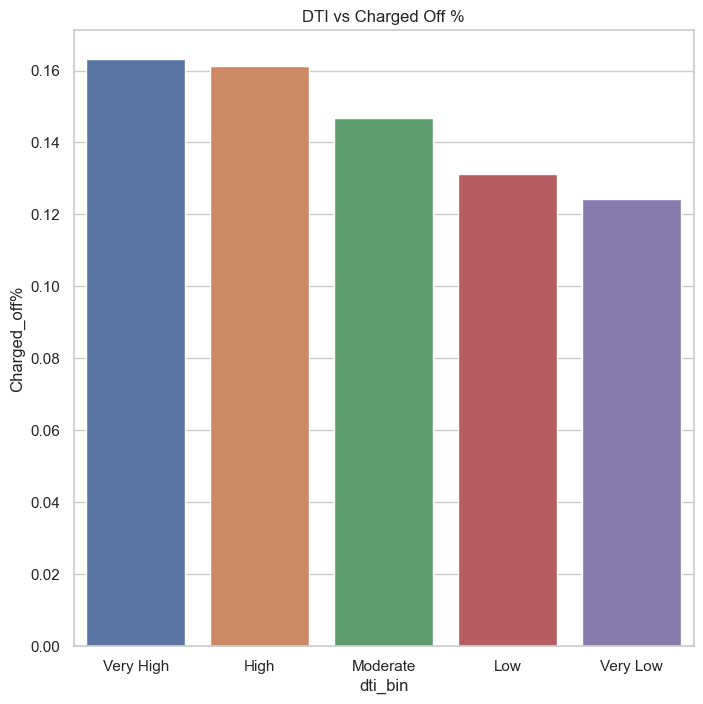

In [101]:
status_vs_dti = loan_data.groupby(['dti_bin','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
status_vs_dti['Total'] = status_vs_dti['Charged Off']+ status_vs_dti['Fully Paid']
status_vs_dti['Charged_off%'] = status_vs_dti['Charged Off']/status_vs_dti['Total']
status_vs_dti = status_vs_dti.sort_values('Charged_off%', ascending = False)

#Ploting the Graph
plt.figure(figsize=(8,8))
ax = sns.barplot(data =status_vs_dti,x='dti_bin', y = 'Charged_off%' )
ax.set_title('DTI vs Charged Off %')
plt.show()

In [102]:
def bucket_revol_util(column):
    if column <= 20:
        return 'Very Low'
    elif (column > 20) and (column <= 40):
        return 'Low'
    elif (column > 40) and (column <= 60):
        return 'Moderate'
    elif (column > 60) and (column <= 80):
        return 'High'
    else:
        return 'Very High'

loan_data['revol_util_bin'] = loan_data.apply(lambda x : bucket_dti(x.revol_util), axis = 1)
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,addr_state,dti,delinq_2yrs,revol_util,pub_rec_bankruptcies,issue_year,issue_month,int_rate_bin,dti_bin,revol_util_bin
0,5000,5000,4975,36 months,10,162.87,B,10+ years,RENT,24000,...,AZ,27,0,83.7,0.0,2011,12,Low,Very High,Very High
1,2500,2500,2500,60 months,15,59.83,C,< 1 year,RENT,30000,...,GA,1,0,9.4,0.0,2011,12,High,Very Low,Low
2,2400,2400,2400,36 months,16,84.33,C,10+ years,RENT,12252,...,IL,8,0,98.5,0.0,2011,12,Very High,Low,Very High
3,10000,10000,10000,36 months,13,339.31,C,10+ years,RENT,49200,...,CA,20,0,21.0,0.0,2011,12,Moderate,High,Very High
5,5000,5000,5000,36 months,7,156.46,A,3 years,RENT,36000,...,AZ,11,0,28.3,0.0,2011,12,Very Low,Moderate,Very High


In [103]:
status_vs_revol_util = loan_data.groupby(['revol_util_bin','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
status_vs_revol_util['Total'] = status_vs_revol_util['Charged Off']+ status_vs_revol_util['Fully Paid']
status_vs_revol_util['Charged_off%'] = status_vs_revol_util['Charged Off']/status_vs_revol_util['Total']
status_vs_revol_util = status_vs_revol_util.sort_values('Charged_off%', ascending = False)


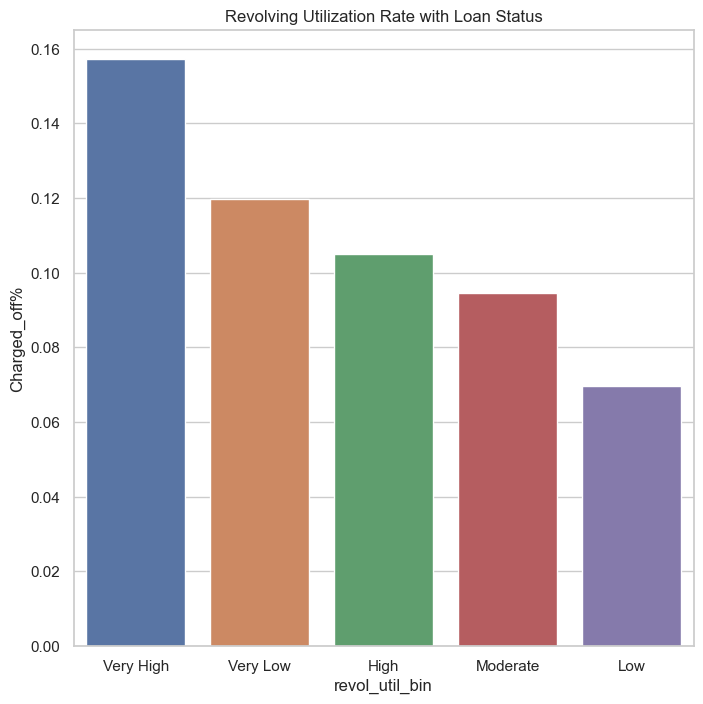

In [104]:
plt.figure(figsize=(8,8))
ax = sns.barplot(data =status_vs_revol_util,x='revol_util_bin', y ='Charged_off%')
ax.set_title('Revolving Utilization Rate with Loan Status')
plt.show()

# Dual Variable Analysis

In [105]:
pd.crosstab(loan_data['grade'], loan_data['int_rate_bin'] )

int_rate_bin,High,Low,Moderate,Very High,Very Low
grade,,,,,
A,0,0,0,0,8970
B,0,7510,1747,0,1138
C,1998,145,4694,154,3
D,2462,1,99,1937,4
E,79,0,1,2208,2
F,2,0,0,825,0
G,0,0,0,246,0


In [106]:

status_vs_grade = loan_data.groupby(['grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
status_vs_grade['Total'] = status_vs_grade['Charged Off']+ status_vs_grade['Fully Paid']
status_vs_grade['Charged_off%'] = status_vs_grade['Charged Off']/status_vs_grade['Total']
status_vs_grade = status_vs_grade.sort_values('Charged_off%', ascending = False)

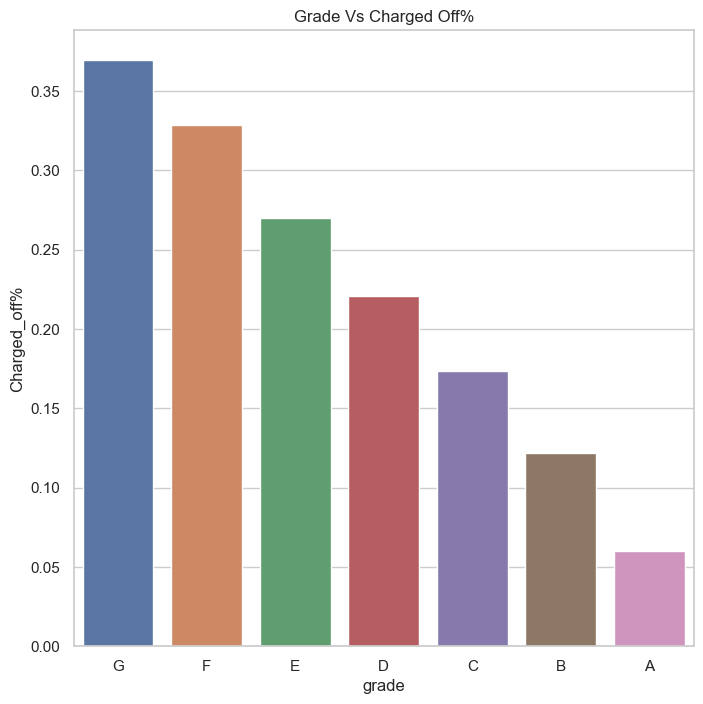

In [107]:
plt.figure(figsize=(8,8))
ax = sns.barplot(data =status_vs_grade,x='grade', y ='Charged_off%')
ax.set_title('Grade Vs Charged Off%')
plt.show()

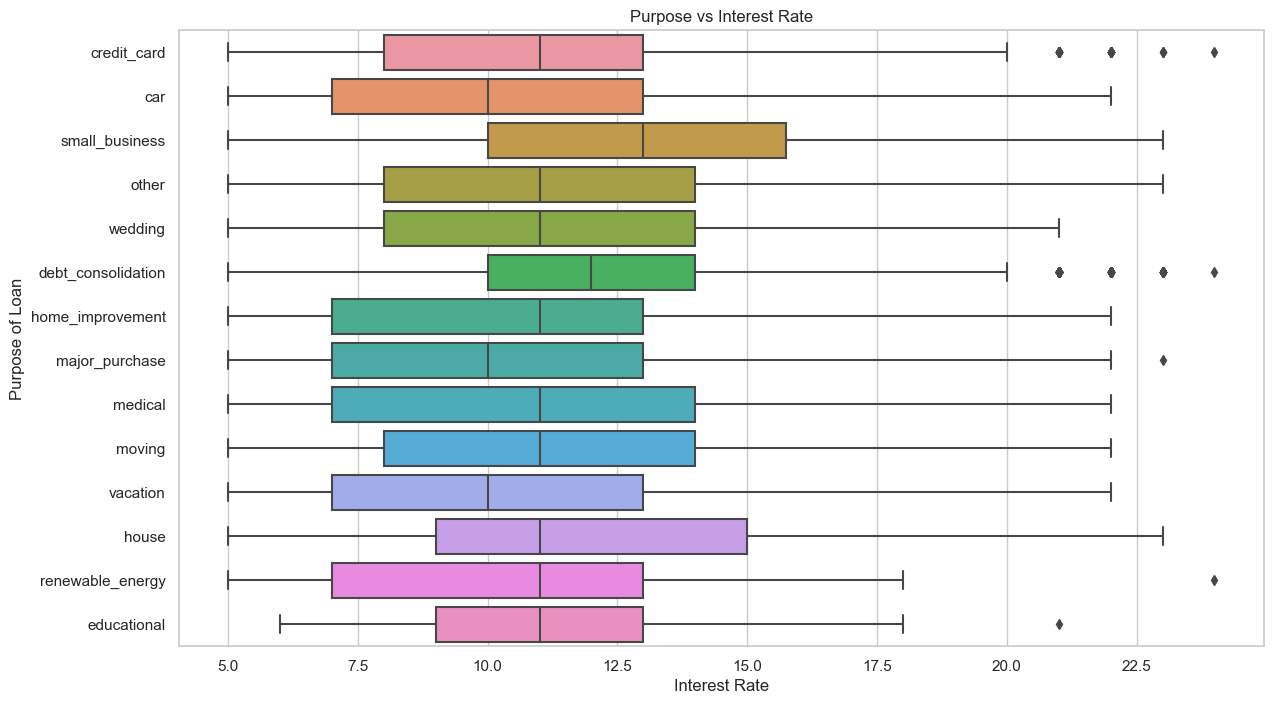

In [108]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(x='int_rate', y='purpose', data =loan_data)
ax.set_title('Purpose vs Interest Rate')
ax.set_xlabel('Interest Rate')
ax.set_ylabel('Purpose of Loan')
plt.show()

In [109]:
status_vs_purpose = loan_data.groupby(['purpose','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
status_vs_purpose['Total'] = status_vs_purpose['Charged Off']+ status_vs_purpose['Fully Paid']
status_vs_purpose['Charged_off%'] = status_vs_purpose['Charged Off']/status_vs_purpose['Total']
status_vs_purpose = status_vs_purpose.sort_values('Charged_off%', ascending = False)

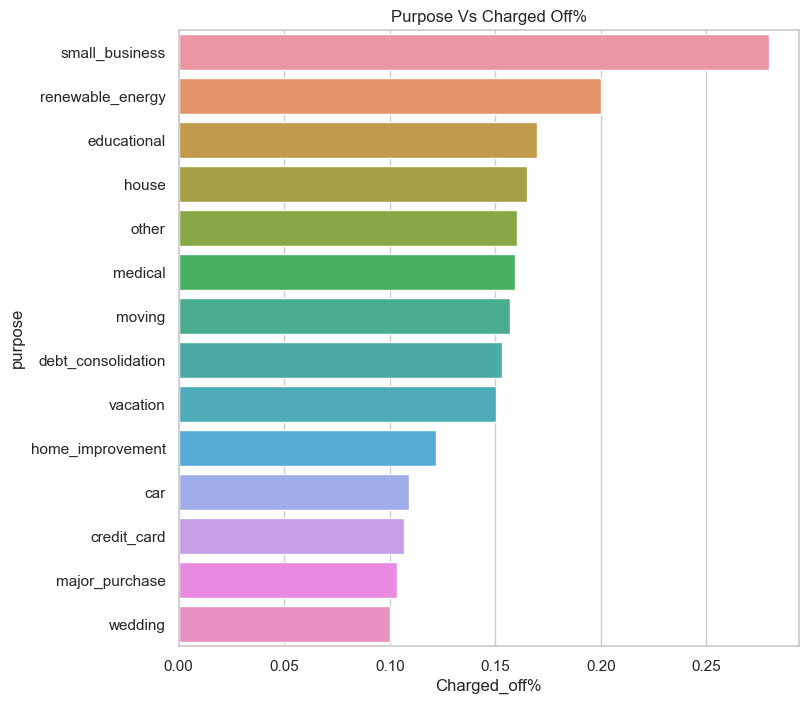

In [110]:
plt.figure(figsize=(8,8))
ax = sns.barplot(data =status_vs_purpose,x='Charged_off%', y ='purpose')
ax.set_title('Purpose Vs Charged Off%')
plt.show()

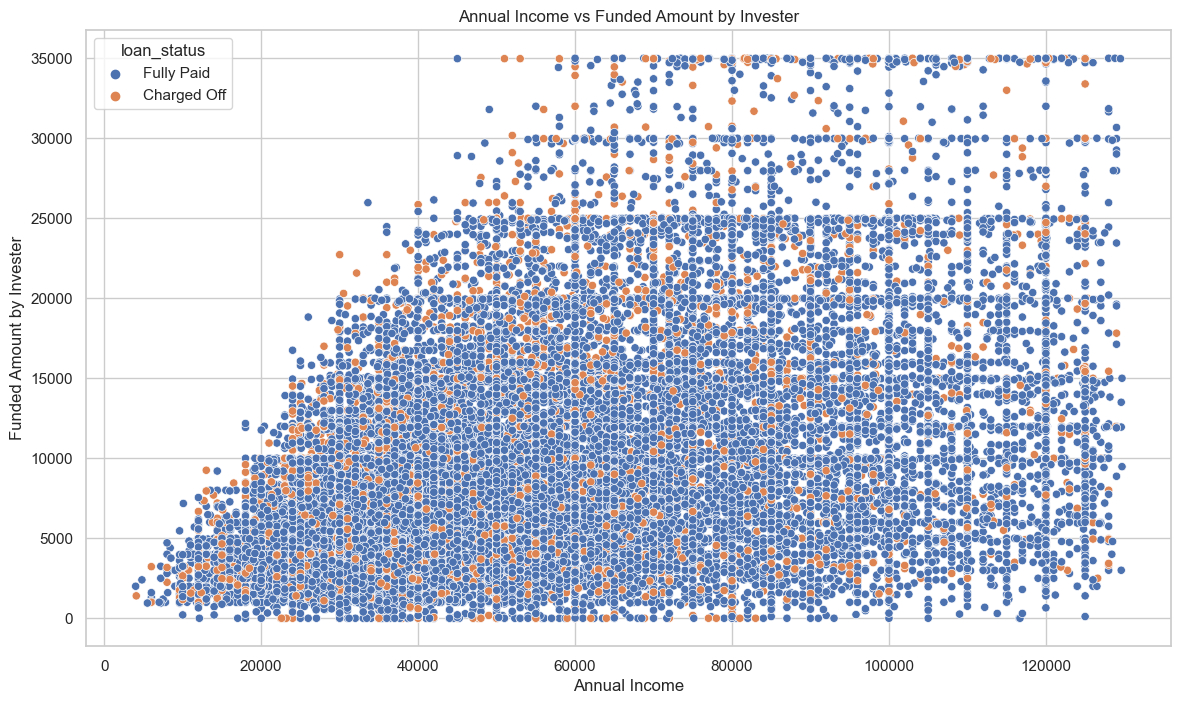

In [111]:
plt.figure(figsize=(14,8))
ax = sns.scatterplot(x='annual_inc', y='funded_amnt_inv', data =loan_data , hue='loan_status')
ax.set_title('Annual Income vs Funded Amount by Invester')
ax.set_xlabel('Annual Income')
ax.set_ylabel('Funded Amount by Invester')
plt.show()

In [112]:
status_vs_emplen = loan_data.groupby(['emp_length','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
status_vs_emplen['Total'] = status_vs_emplen['Charged Off']+ status_vs_emplen['Fully Paid']
status_vs_emplen['Charged_off%'] = status_vs_emplen['Charged Off']/status_vs_emplen['Total']
status_vs_emplen = status_vs_emplen.sort_values('Charged_off%', ascending = False)


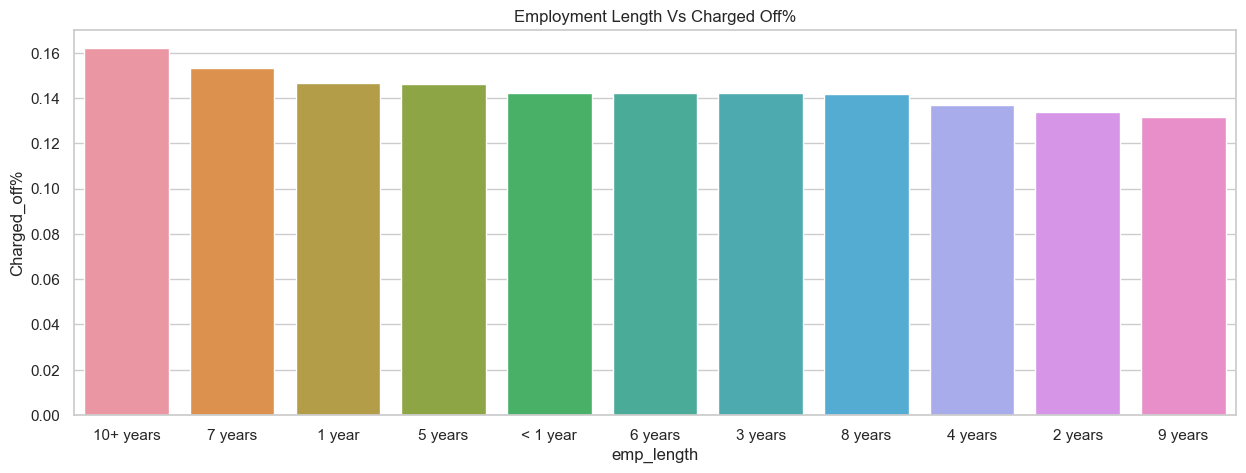

In [113]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data =status_vs_emplen,x='emp_length', y ='Charged_off%')
ax.set_title('Employment Length Vs Charged Off%')
plt.show()

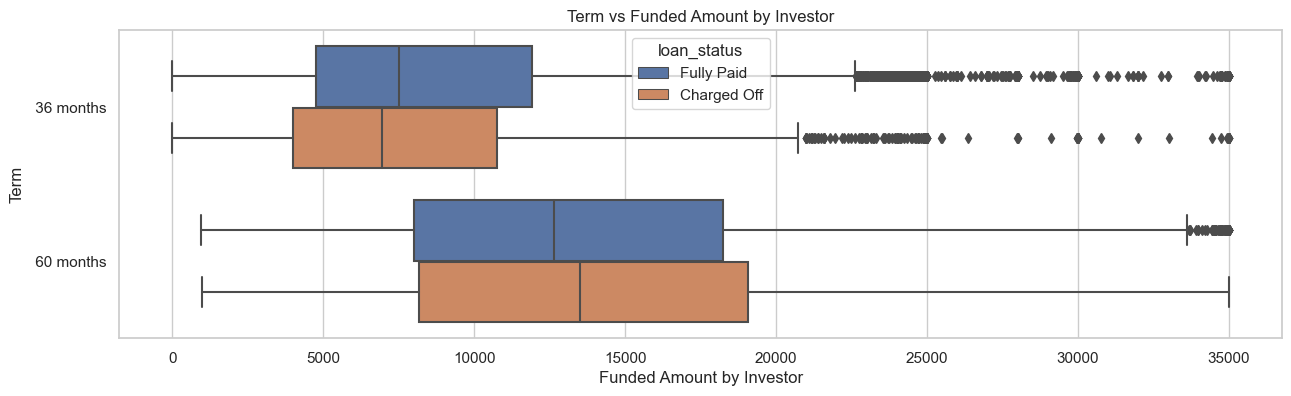

In [114]:
plt.figure(figsize=(15,4))
ax = sns.boxplot(x='funded_amnt_inv', y='term',hue ='loan_status', data =loan_data)
ax.set_title('Term vs Funded Amount by Investor')
ax.set_xlabel('Funded Amount by Investor')
ax.set_ylabel('Term')
plt.show()

In [115]:
status_vs_addr = loan_data.groupby(['addr_state','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
status_vs_addr['Total'] = status_vs_addr['Charged Off']+ status_vs_addr['Fully Paid']
status_vs_addr['Charged_off%'] = status_vs_addr['Charged Off']/status_vs_addr['Total']
status_vs_addr = status_vs_addr.sort_values('Charged_off%', ascending = False)


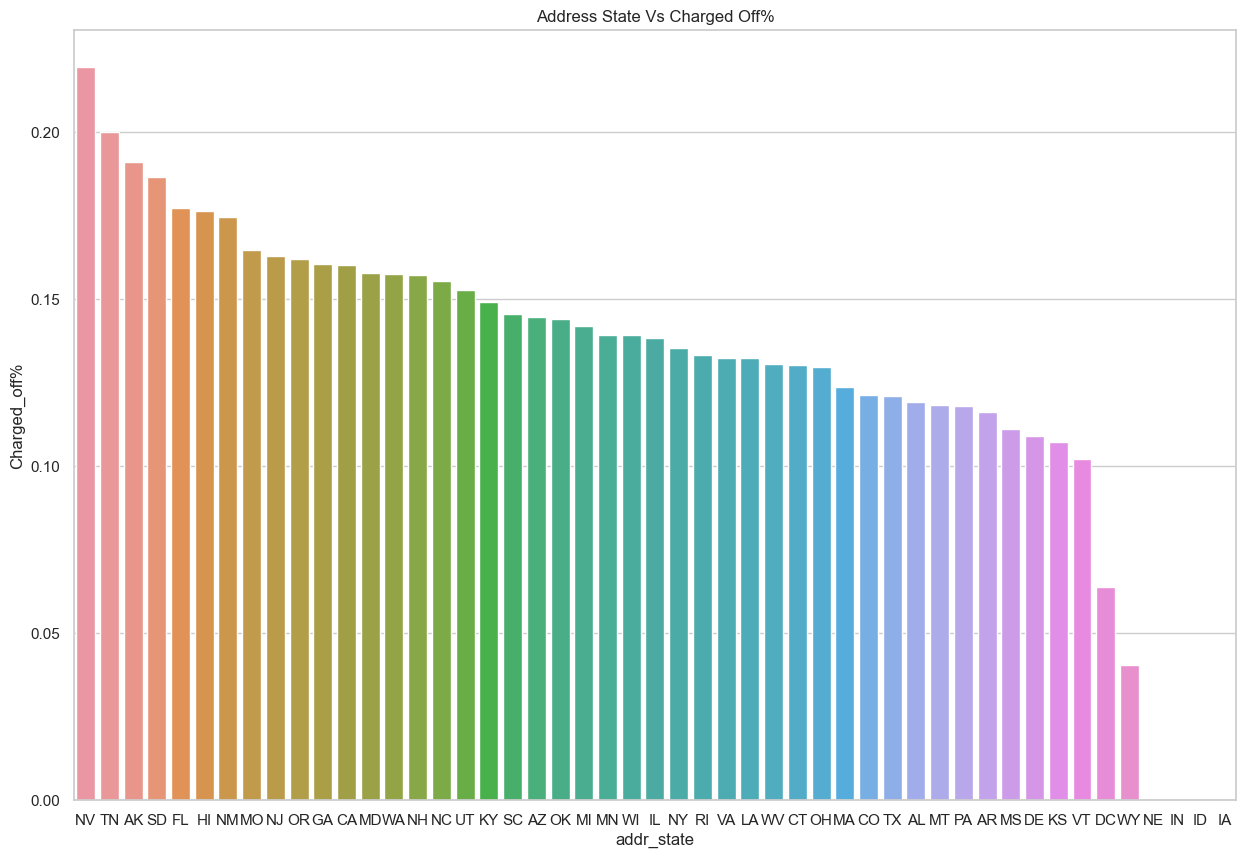

In [116]:
plt.figure(figsize=(15,10))
ax = sns.barplot(data =status_vs_addr,x='addr_state', y ='Charged_off%')
ax.set_title('Address State Vs Charged Off%')
plt.show()

# Matrix of Correlations 

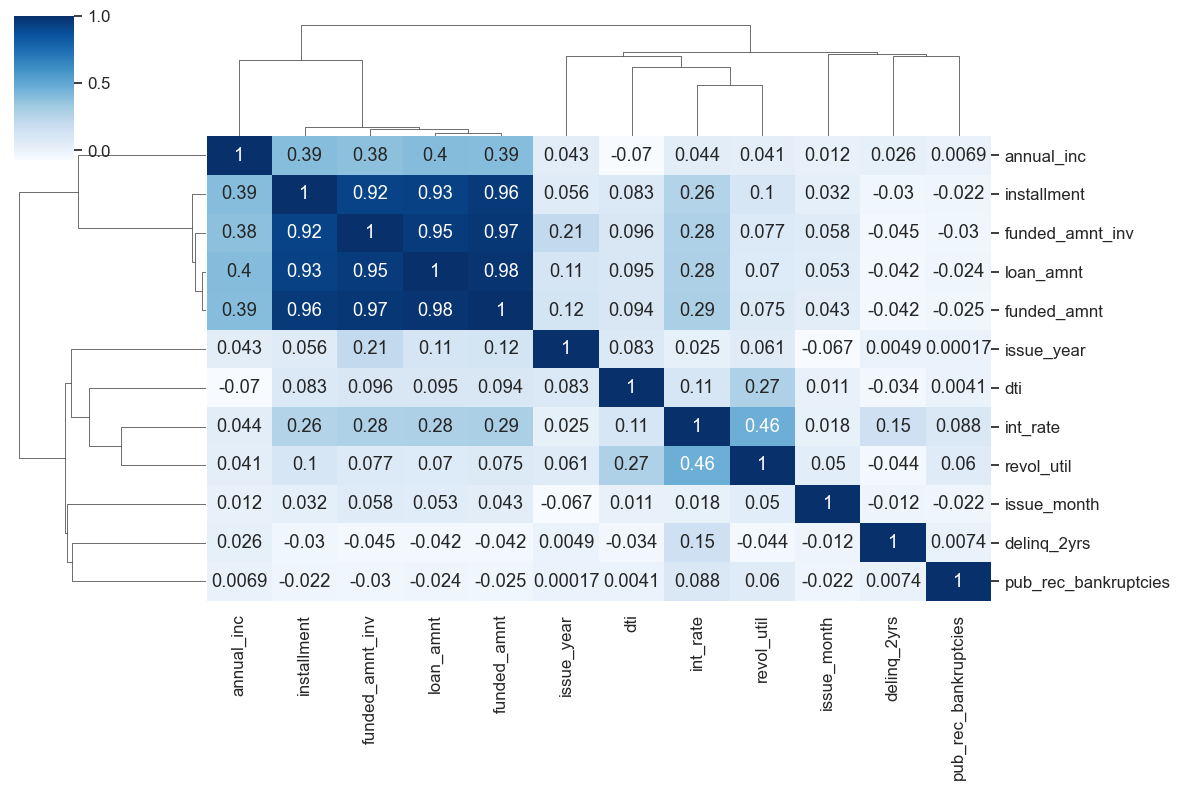

In [117]:
numeric_columns = loan_data.select_dtypes(include=['float64', 'int64','int32']).columns
numeric_data = loan_data[numeric_columns]

corr = numeric_data.corr()
sns.set(font_scale=1.1)
sns.clustermap(corr, annot=True, figsize=(12, 8),cmap="Blues")
plt.show()

# Conclusion

Based on the study above, we can determine that the following variables serve as default drivers:
    1. Increased rates of interest
    2. Poor scores (F & G).
    3. A greater ratio of debt to income
    4. A Greater Rate of Revolving Utilization 
    5. The goal is small business.
    6. Rent or mortgage is home ownership
    7. A reduced yearly salary. 
    
    
Additional insights:
    1. The highest rate of default is in Nevada.
    2. The Charged off % is higher for terms of 60 months.
    3. The default rate for unverified applications is somewhat greater than that of verified and source-confirmed        applications.
    4. The highest default rate occurs after more than ten years of employment, followed by seven and one years.
    
